## Introduction

### Etapes préliminaires de l'analyse de données

Objetcifs de cette analyse :    
-Résumer les principales charactéristiques des données    
-Avoir une meilleure compréhension du jeu de données   
-Découvrir des relations entre les variables   
-Extraire les variables importantes   

**Déterminer les caractéristiques qui ont un le plus un impact sur le prix de la voiture**

In [1]:
import pandas as pd
url = "automobile.csv"
df=pd.read_csv(url)

## Statistiques descriptives

Variable numérique : Informations statistiques

In [2]:
df.describe()

,Unnamed: 0,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,102.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,0.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,51.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,102.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,153.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,204.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Comptage des variables non numériques

In [6]:
drive_wheels_counts=df["drive-wheels"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64


Observation Target=f(Variable)

Text(0, 0.5, 'Price')

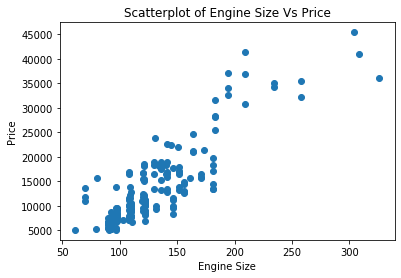

In [17]:
import matplotlib.pyplot as plt
x=df['engine-size'][df["price"]!='?']
y=df["price"][df["price"]!='?'].astype(int)
plt.scatter(x,y)
plt.title('Scatterplot of Engine Size Vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')

## Analyse par groupes

Pré-traitement

In [31]:
df_test=df[['drive-wheels','body-style','price']][df["price"]!='?']
df_test["price"]=df_test["price"].astype(int)

Méthode groupby pour étudier l'influence combinée de deux variables sur le prix

In [32]:
df_grp=df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Pivot Table - Présentation plus agréable du résultat

In [34]:
df_pivot = df_grp.pivot(index='drive-wheels',columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Heatmap - Représentation visuelle (graduation des axes imparfaites)

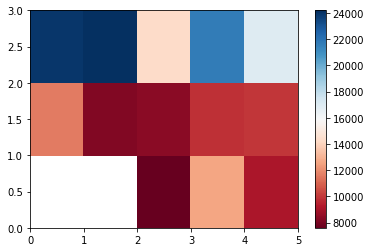

In [36]:
import matplotlib.pyplot as plt
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

## Analyse de variance (ANOVA)